In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


# Libraries

In [2]:
import numpy as np
import pandas as pd

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data loading

In [3]:
train =pd.read_csv("../input/titanic/train.csv")
test =pd.read_csv("../input/titanic/test.csv")

train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Knight, Mr. Robert J",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Visulaization

# Compare survived people according to their sex and we can see that female servived more.

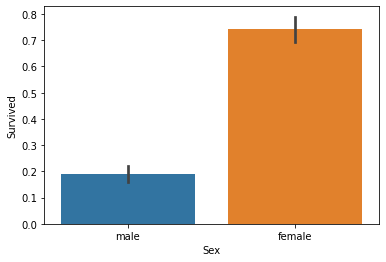

In [7]:
sns.barplot(x="Sex", y="Survived", data=train)

# As predicted, people with higher socioeconomic class had a higher rate of survival.

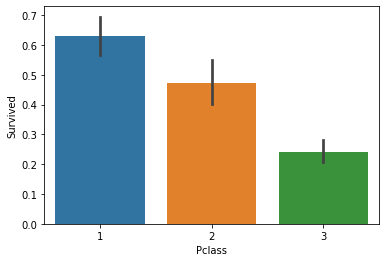

In [8]:
sns.barplot(x="Pclass", y="Survived", data=train)

#  general, it's clear that people with more siblings or spouses aboard were less likely to survive. However, contrary to expectations, people with no siblings or spouses were less to likely to survive than those with one or two

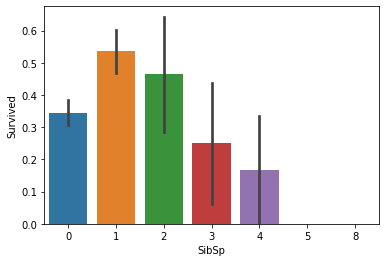

In [9]:
sns.barplot(x="SibSp", y="Survived", data=train)

# People with less than four parents or children aboard are more likely to survive than those with four or more. Again, people traveling alone are less likely to survive than those with 1-3 parents or children.

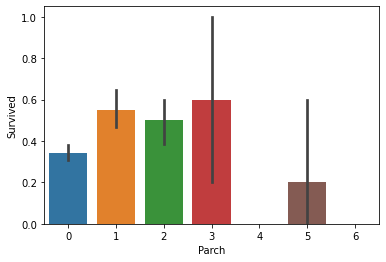

In [10]:
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

# People with a recorded Cabin number are, in fact, more likely to survive

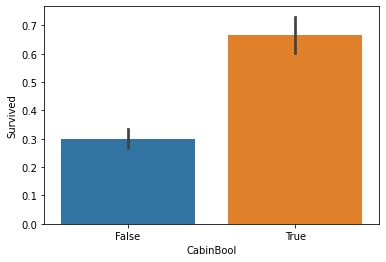

In [11]:
train['CabinBool']=train["Cabin"].notnull()
test['CabinBool']=test["Cabin"].notnull()
sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

# Data Cleaning

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  CabinBool    891 non-null    bool   
dtypes: bool(1), float64(2), int64(5), object(5)
memory usage: 84.5+ KB


# Embarked Feature

In [13]:
print(train.Embarked [train.Embarked == 'S'].count())
print(train.Embarked [train.Embarked == 'C'].count())
print(train.Embarked [train.Embarked == 'Q'].count())

644
168
77


## Fill NAN with majority value  which is "S"

In [14]:
train = train.fillna({"Embarked": "S"})

embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,2,True
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,1,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,1,False


# sex feature

In [15]:

train['Sex'] = train['Sex'].map({"male": 0, "female": 1})
test['Sex'] = test['Sex'].map({"male": 0, "female": 1})

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,CabinBool
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,1,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2,True
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,1,False


# Cabin Feature

In [16]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

# Ticket Feature

In [17]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

# Name Feature

In [18]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

# Filling unknown value of age and Fare by mean of present values

In [19]:
train.Age.fillna(value=train.Age.mean(), inplace=True)
train.Fare.fillna(value=train.Fare.mean(), inplace=True)

test.Age.fillna(value=test.Age.mean(), inplace=True)
test.Fare.fillna(value=test.Fare.mean(), inplace=True)

# Changing Cabin value into boolean

In [20]:
train['CabinBool'] = train['CabinBool'].map({True: 0, False: 1})
test['CabinBool'] = test['CabinBool'].map({True: 0, False: 1})

In [21]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,CabinBool
0,1,0,3,0,22.0,1,0,7.2500,1,1
1,2,1,1,1,38.0,1,0,71.2833,2,0
2,3,1,3,1,26.0,0,0,7.9250,1,1
3,4,1,1,1,35.0,1,0,53.1000,1,0
4,5,0,3,0,35.0,0,0,8.0500,1,1


# converting different age group into different age stages

In [22]:

bins = [ 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = [ 'Baby', 'Child', 'Teenager', 'Student', 'Young', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)


In [23]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

# Droping Age column because we have already converted into stages

In [24]:
train=train.drop(['Age'],axis =1)
test =test.drop(['Age'],axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup
0,1,0,3,0,1,0,7.2500,1,1,4
1,2,1,1,1,1,0,71.2833,2,0,6
2,3,1,3,1,0,0,7.9250,1,1,5
3,4,1,1,1,1,0,53.1000,1,0,5
4,5,0,3,0,0,0,8.0500,1,1,5


# Comparing survived in different age group

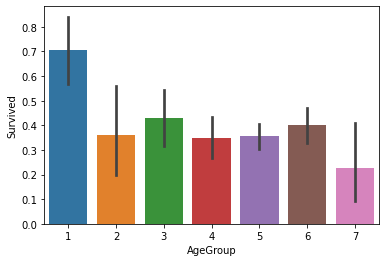

In [25]:
sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()


In [26]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
SibSp          0
Parch          0
Fare           0
Embarked       0
CabinBool      0
AgeGroup       0
dtype: int64

In [27]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,CabinBool,AgeGroup
0,1,0,3,0,1,0,7.2500,1,1,4
1,2,1,1,1,1,0,71.2833,2,0,6
2,3,1,3,1,0,0,7.9250,1,1,5
3,4,1,1,1,1,0,53.1000,1,0,5
4,5,0,3,0,0,0,8.0500,1,1,5


# Splitting Data

In [28]:
from sklearn.model_selection import train_test_split

X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(X, y)


# Models 

# Logistic Regression

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(x_train, y_train)
y_pred = log_model.predict(x_val)
acc_log=accuracy_score(y_pred, y_val) * 100
print(acc_log)

75.33632286995515


# Support vector machine

In [30]:
from sklearn.svm import SVC
svm_model =SVC()
svm_model.fit(x_train,y_train)
y_pred =svm_model.predict(x_val)
acc_svc =accuracy_score(y_pred,y_val)*100
print(acc_svc)



64.57399103139014


# Decision Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier

decisiontree_model =DecisionTreeClassifier()
decisiontree_model.fit(x_train,y_train)
y_pred =decisiontree_model.predict(x_val)

acc_decisiontree_model=accuracy_score(y_pred, y_val)*100
print(acc_decisiontree_model)

76.23318385650224


# Random Forest Clsiifier

In [32]:
from sklearn.ensemble import RandomForestClassifier

randomforest_model = RandomForestClassifier()
randomforest_model.fit(x_train, y_train)
y_pred = randomforest_model.predict(x_val)
acc_randomforest =accuracy_score(y_pred, y_val) * 100
print(acc_randomforest)

78.9237668161435


# KNN Model

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)
y_pred = knn_model.predict(x_val)
acc_knn_model = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn_model)

72.2


# SGDC Classifier

In [34]:
from sklearn.linear_model import SGDClassifier

sgd_model = SGDClassifier()
sgd_model.fit(x_train, y_train)
y_pred = sgd_model.predict(x_val)
acc_sgd_model = accuracy_score(y_pred, y_val) * 100
print(acc_sgd_model)

61.43497757847533


# Gradient Boosting Classifier

In [35]:
from sklearn.ensemble import GradientBoostingClassifier

gbk_model = GradientBoostingClassifier()
gbk_model.fit(x_train, y_train)
y_pred = gbk_model.predict(x_val)
acc_gbk_model= accuracy_score(y_pred, y_val) * 100
print(acc_gbk_model)

78.9237668161435


# Model compare

In [36]:
compare =pd.DataFrame({
    'model':['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn_model, acc_log, 
              acc_randomforest, acc_decisiontree_model,
              acc_sgd_model, acc_gbk_model]
})

In [37]:
compare

,model,Score
0,Support Vector Machines,64.573991
1,KNN,72.200000
2,Logistic Regression,75.336323
3,Random Forest,78.923767
4,Decision Tree,76.233184
5,Stochastic Gradient Descent,61.434978
6,Gradient Boosting Classifier,78.923767


# Submission data

In [38]:
ids = test['PassengerId']
predictions = gbk_model.predict(test.drop('PassengerId', axis=1))

output_file = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output_file.to_csv('submission.csv', index=False)